# HOUSE PRICE PREDICTION REGRESSION PROJECT

## Project Goal

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

## Load Data

In [2]:
train_data_path = r"D:\Data-Science\Projects\House_Price_Prediction\data\train.csv"
test_data_path = r"D:\Data-Science\Projects\House_Price_Prediction\data\test.csv"

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

print("Shape of df_train: ", df_train.shape)
print("Shape of df_test: ", df_test.shape)

Shape of df_train:  (1460, 81)
Shape of df_test:  (1459, 80)


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Know Your Data

## Data Integration

In [5]:
df = pd.concat([df_train, df_test])
print("Shape of Integrated Data: ", df.shape)

Shape of Integrated Data:  (2919, 81)


In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [7]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Get the Brief Information of Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [9]:
int_features = df.select_dtypes(include=["int64"]).columns
print("Total number of integer features: ", int_features.shape[0])
print("Integer feature names: ", int_features.tolist())

Total number of integer features:  26
Integer feature names:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [10]:
float_features = df.select_dtypes(include=["float64"]).columns
print("Total number of floating features: ", float_features.shape[0])
print("Floating feature names: ", float_features.tolist())

Total number of floating features:  12
Floating feature names:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [11]:
cat_features = df.select_dtypes(include=["object"]).columns
print("Total number of object features: ", cat_features.shape[0])
print("Object feature names: ", cat_features.tolist())

Total number of object features:  43
Object feature names:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Get the Statistical Information of Numerical Features

In [12]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Handling Missing Value

### Visualise nullMissing value

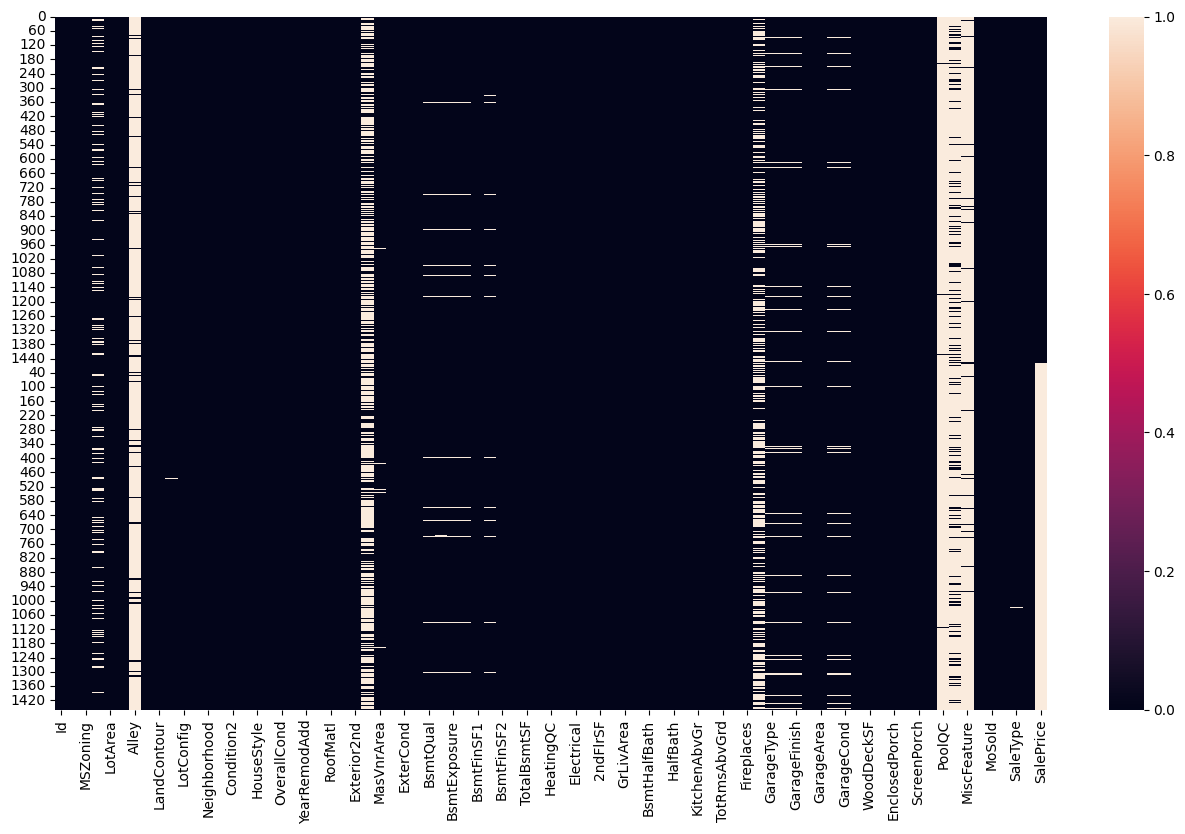

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

### Get the null value percentage for evey feature

In [14]:
null_count = df.isnull().sum()
print(null_count)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64


In [15]:
null_percent = df.isnull().sum()/df.shape[0] * 100
print(null_percent)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 81, dtype: float64


## Drop Columns/ Features
As per observation, we will not drop any feature from dataset.

In [16]:
"""As per domain knowledge we will not drop these features, 
instead None value we will add constant value"""

miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [17]:
"""As per domain knowledge we will not drop FireplaceQu features, 
instead None value we will add constant value"""
miss_value_20_50_perc = null_percent[(null_percent > 20) & (null_percent < 51)]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [18]:
"""As per domain knowledge we will not drop FireplaceQu features, 
instead None value we will add constant value"""
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 21)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

## Missing Value Imputation

In [19]:
missing_value_feat = null_percent[null_percent > 0]
print("Total missing value features: ", len(missing_value_feat))

Total missing value features:  35


In [20]:
missing_value_feat

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [21]:
cat_na_feat = missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("Total number of categorical missing features: ", len(cat_na_feat))
cat_na_feat

Total number of categorical missing features:  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [22]:
int_na_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("Total number of integer missing features: ", len(int_na_feat))
int_na_feat

Total number of integer missing features:  0


Series([], dtype: float64)

In [23]:
float_na_feat = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("Total number of floating missing features: ", len(float_na_feat))
float_na_feat

Total number of floating missing features:  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

## Handling MSZoning = 0.137033

In [24]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

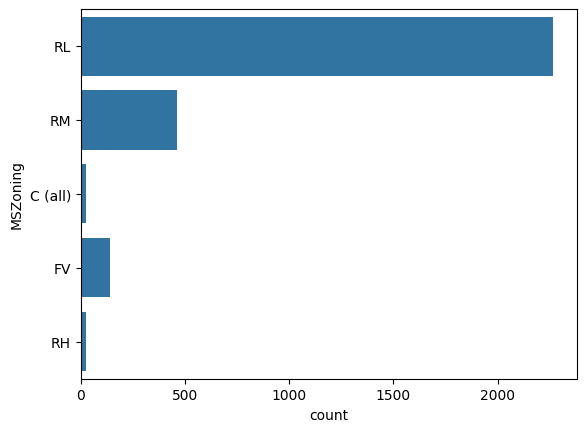

In [25]:
sns.countplot(df["MSZoning"])

In [26]:
### backup of original data 
df_mvi = df.copy()
df_mvi.shape

(2919, 81)

In [27]:
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan, mszoning_mode, inplace=True)
df_mvi["MSZoning"].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\4131643454.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan, mszoning_mode, inplace=True)


np.int64(0)

<Axes: xlabel='count', ylabel='MSZoning'>

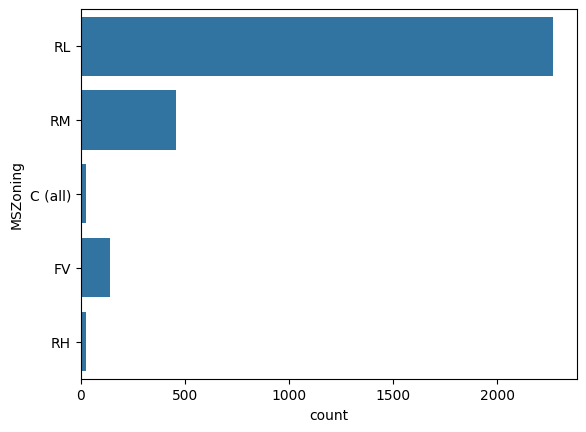

In [28]:
sns.countplot(df_mvi["MSZoning"])

In [29]:
def oldNewCountPlot(df, df_new, feature):
    plt.subplot(121)
    sns.countplot(df[feature])
    plt.title("Old Data Distribution")
    plt.subplot(122)
    sns.countplot(df_new[feature])
    plt.title("New Data Distribution")

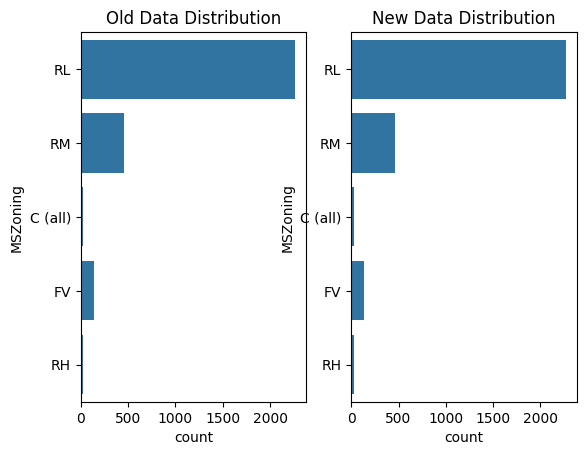

In [30]:
oldNewCountPlot(df, df_mvi, "MSZoning")
plt.savefig("EDA_img/MSZoningBefore&After.png")

## Handling Alley = 93.216855

In [31]:
df_mvi["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [32]:
alley_count = "NA"
df_mvi["Alley"].replace(np.nan, alley_count, inplace=True)
df_mvi["Alley"].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\46726788.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan, alley_count, inplace=True)


np.int64(0)

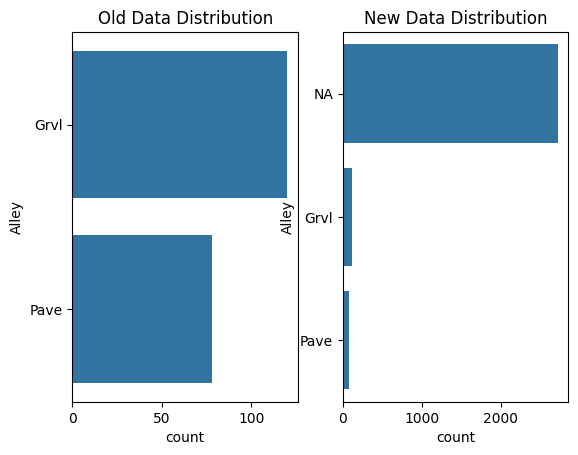

In [33]:
oldNewCountPlot(df, df_mvi, "Alley")
plt.savefig("EDA_img/AlleyBefore&After.png")

## Handling LotFrontage = 16.649538

In [34]:
def boxHistPlot(df, figsize= (16, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.distplot(df)

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\3993015979.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


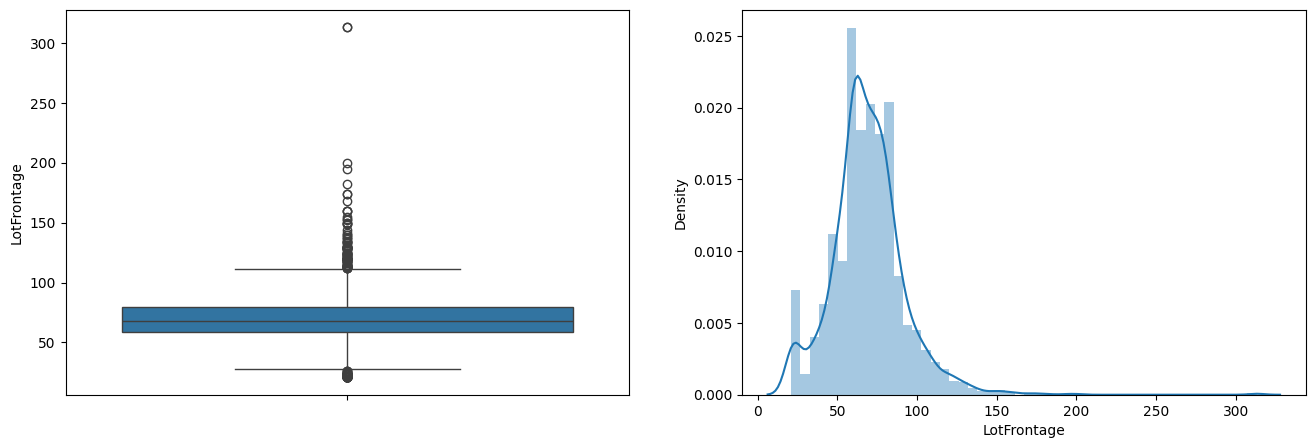

In [35]:
boxHistPlot(df["LotFrontage"])

In [36]:
lotFrontage_mean = df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan, lotFrontage_mean, inplace=True)
df_mvi["LotFrontage"].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\2322355082.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan, lotFrontage_mean, inplace=True)


np.int64(0)

In [37]:
def oldNewBoxHistPlot(df, df_new, feature, figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title("Old Data Distribution")
    plt.subplot(222)
    sns.distplot(df[feature])
    plt.title("Old Data Distribution")

    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.title("New Data Distribution")
    plt.subplot(224)
    sns.distplot(df_new[feature])
    plt.title("New Data Distribution")

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\410120950.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
C:\Users\hp\AppData\Local\Temp\ipykernel_9588\410120950.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature])


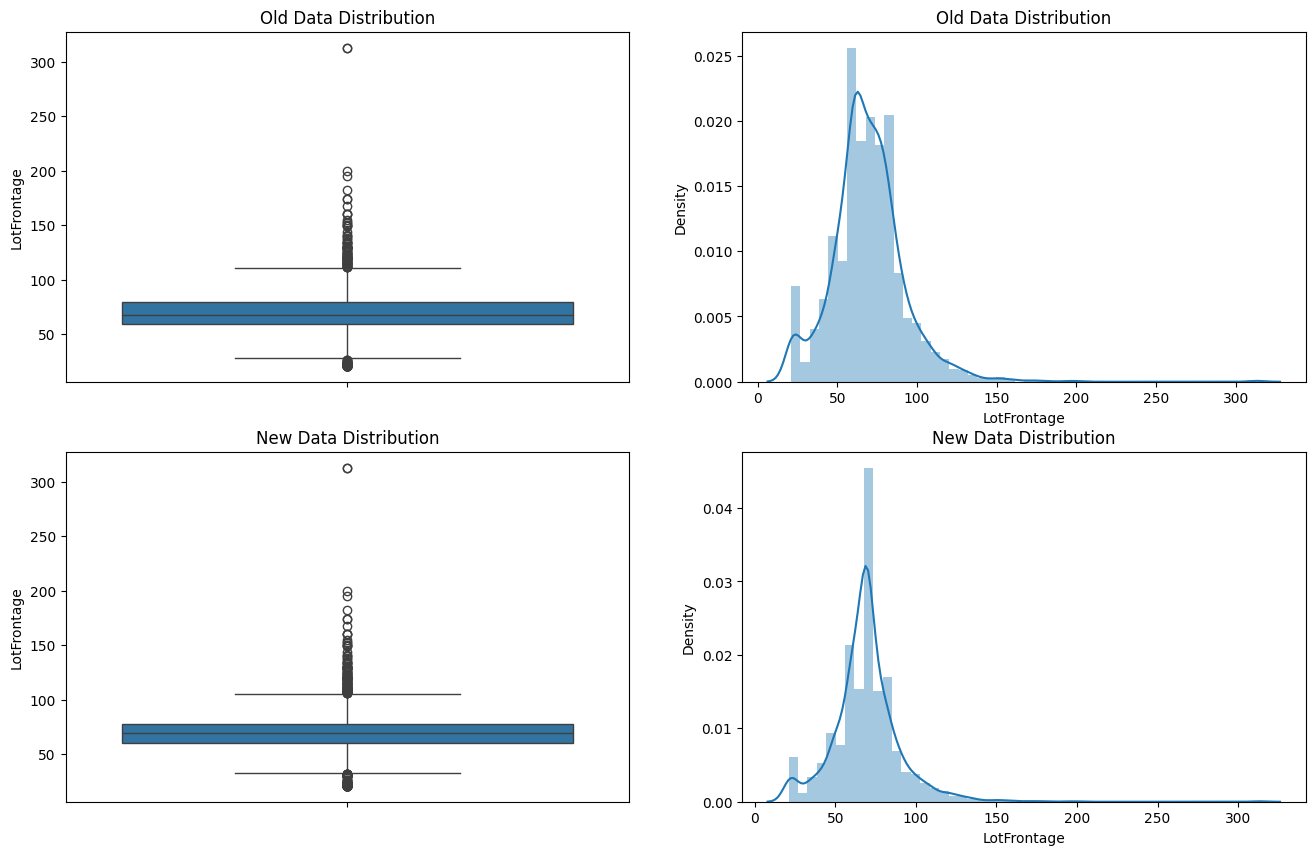

In [38]:
oldNewBoxHistPlot(df, df_mvi, "LotFrontage")
plt.savefig("EDA_img/LotFrontageBefore&After.png")

### Handling Utilities = 0.068517

In [39]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [40]:
utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace=True)
df_mvi["Utilities"].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\2892814966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace=True)


np.int64(0)

### Handling Exterior1st = 0.034258 and Exterior2nd = 0.034258

In [41]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [42]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [43]:
exterior1st_mode = df["Exterior1st"].mode()[0]
exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, exterior1st_mode, inplace=True)
df_mvi["Exterior2nd"].replace(np.nan, exterior2nd_mode, inplace=True)
print("E1st is null: ", df_mvi["Exterior1st"].isnull().sum())
print("E2nd is null: ", df_mvi["Exterior2nd"].isnull().sum())

E1st is null:  0
E2nd is null:  0


C:\Users\hp\AppData\Local\Temp\ipykernel_9588\301655798.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan, exterior1st_mode, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_9588\301655798.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

### Handling MasVnrType = 0.822199 and MasVnrArea = 0.787941

In [44]:
masvnrtype_mode = df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan, masvnrtype_mode, inplace=True)
df_mvi["MasVnrType"].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\2502857623.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan, masvnrtype_mode, inplace=True)


np.int64(0)

In [45]:
masvnrarea_cont = 0
df_mvi["MasVnrArea"].replace(np.nan, masvnrarea_cont, inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\433503322.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrArea"].replace(np.nan, masvnrarea_cont, inplace=True)


np.int64(0)

### Handling Bsmt Features

In [46]:
cat_bsmt_feat = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
num_bsmt_feat = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]

In [47]:
bsmt_cont = "NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_cont, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\3816147302.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bsmt_cont, inplace=True)


In [48]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [49]:
bsmt_num = 0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_num, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\2522624236.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bsmt_num, inplace=True)


In [50]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

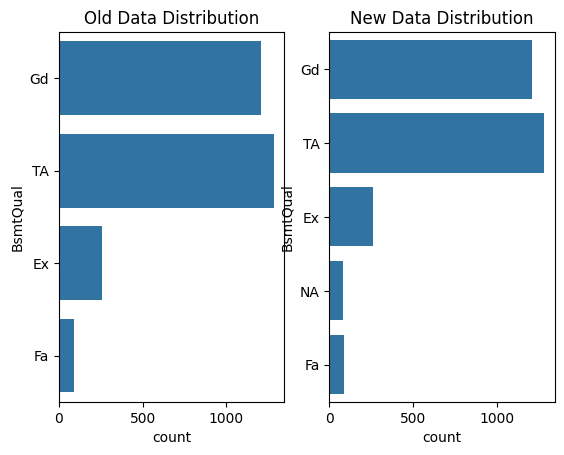

In [51]:
oldNewCountPlot(df, df_mvi, "BsmtQual")
plt.savefig("EDA_img/BsmtQualBefore&After.png")

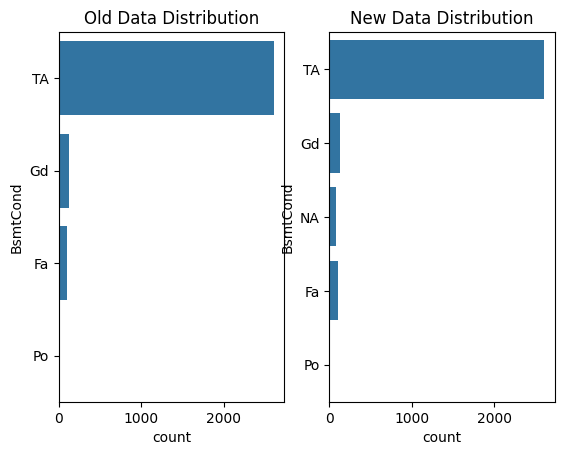

In [52]:
oldNewCountPlot(df, df_mvi, "BsmtCond")
plt.savefig("EDA_img/BsmtCondBefore&After.png")

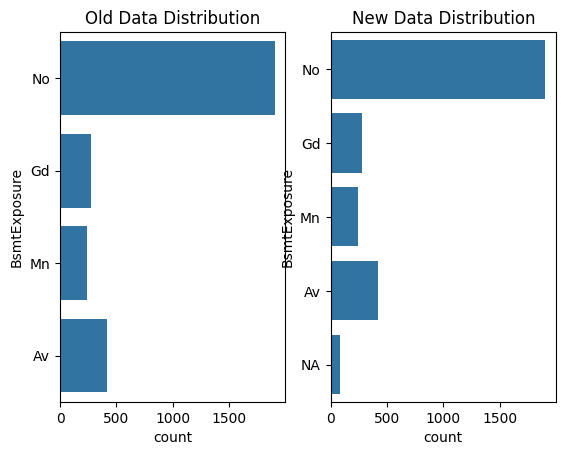

In [53]:
oldNewCountPlot(df, df_mvi, "BsmtExposure")
plt.savefig("EDA_img/BsmtExposureBefore&After.png")

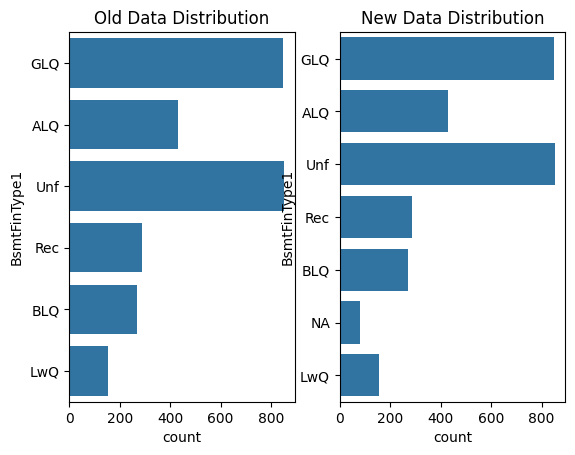

In [54]:
oldNewCountPlot(df, df_mvi, "BsmtFinType1")
plt.savefig("EDA_img/BsmtFinType1Before&After.png")

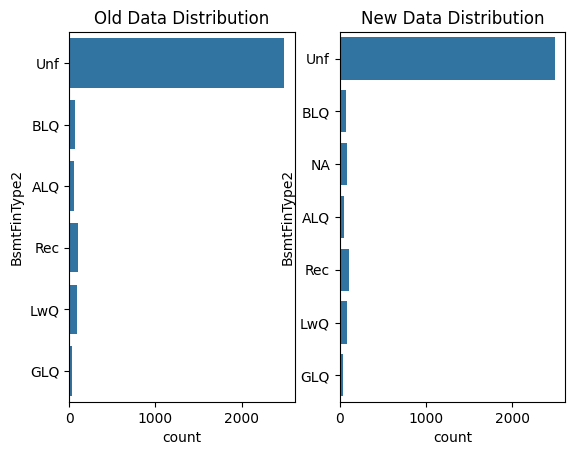

In [55]:
oldNewCountPlot(df, df_mvi, "BsmtFinType2")
plt.savefig("EDA_img/BsmtFinType2Before&After.png")

### Handling Electrical = 0.034258 and KitchenQual = 0.034258

In [56]:
electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, electrical_mode, inplace=True)
df_mvi["Electrical"].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\223436786.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].replace(np.nan, electrical_mode, inplace=True)


np.int64(0)

In [57]:
kitchenQual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan, kitchenQual_mode, inplace=True)
df_mvi["KitchenQual"].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\109724168.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].replace(np.nan, kitchenQual_mode, inplace=True)


np.int64(0)

### Handling Remaining Cat features

In [58]:
functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan, functional_mode, inplace=True)
df_mvi["Functional"].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\3511111057.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].replace(np.nan, functional_mode, inplace=True)


np.int64(0)

In [59]:
saleType_mode = df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan, saleType_mode, inplace=True)
df_mvi["SaleType"].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\2870088343.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["SaleType"].replace(np.nan, saleType_mode, inplace=True)


np.int64(0)

In [60]:
other_cat_feat = ["FireplaceQu", "PoolQC", "Fence", "MiscFeature"]

for feat in other_cat_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of FireplaceQu: FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
Value count of PoolQC: PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Value count of Fence: Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
Value count of MiscFeature: MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [61]:
fireplacequ_cont = "NA"
df_mvi["FireplaceQu"].replace(np.nan, fireplacequ_cont, inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\138265037.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["FireplaceQu"].replace(np.nan, fireplacequ_cont, inplace=True)


np.int64(0)

In [62]:
poolqc_cont = "NA"
df_mvi["PoolQC"].replace(np.nan, poolqc_cont, inplace=True)
df_mvi["PoolQC"].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\439093244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["PoolQC"].replace(np.nan, poolqc_cont, inplace=True)


np.int64(0)

In [63]:
fence_cont = "NA"
df_mvi["Fence"].replace(np.nan, fence_cont, inplace=True)
df_mvi["Fence"].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\2172436989.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Fence"].replace(np.nan, fence_cont, inplace=True)


np.int64(0)

In [64]:
miscFeature_cont = "NA"
df_mvi["MiscFeature"].replace(np.nan, miscFeature_cont, inplace=True)
df_mvi["MiscFeature"].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\2384615004.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MiscFeature"].replace(np.nan, miscFeature_cont, inplace=True)


np.int64(0)

### Handling Garage

In [65]:
cat_garage_feat = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
num_garage_feat = ["GarageYrBlt", "GarageCars", "GarageArea"]

In [66]:
garage_cont = "NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan, garage_cont, inplace=True)
df_mvi[cat_garage_feat].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\917210195.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, garage_cont, inplace=True)


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [67]:
garage_num = 0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan, garage_num, inplace=True)
df_mvi[num_garage_feat].isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_9588\3407053120.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, garage_num, inplace=True)


GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

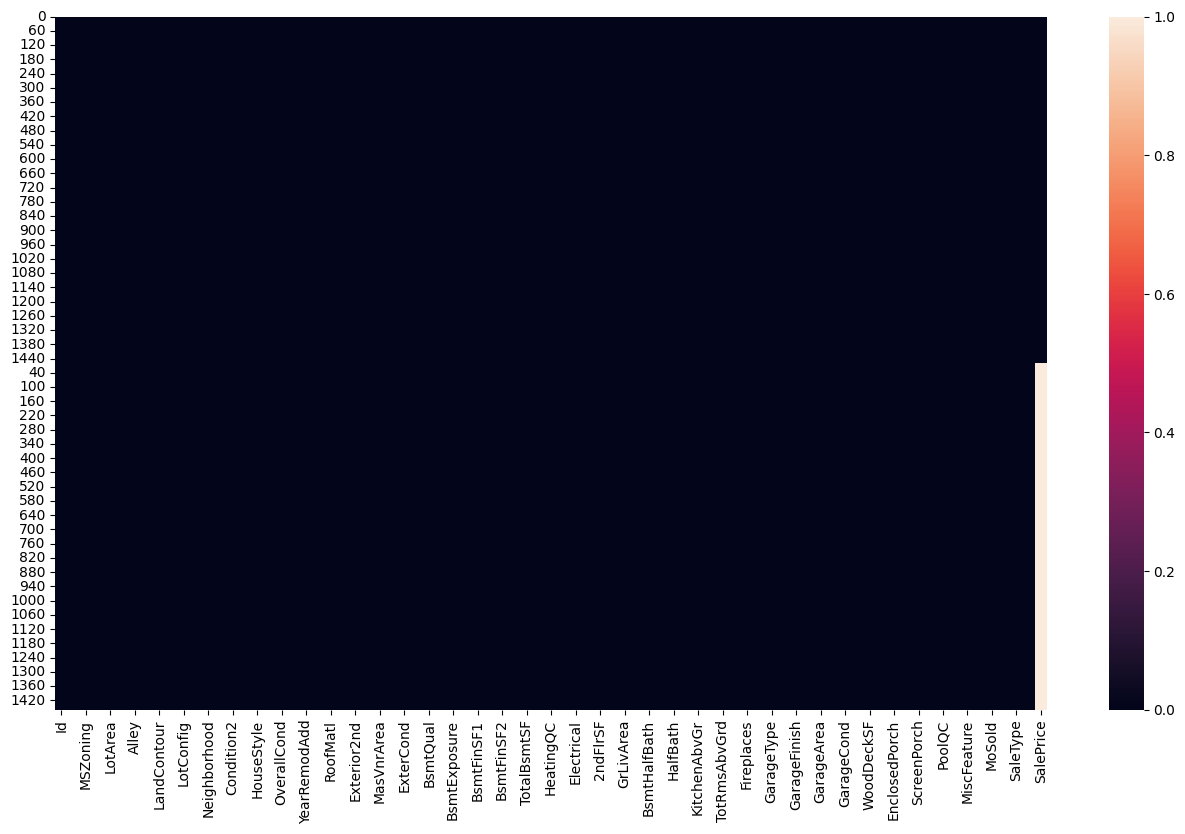

In [68]:
plt.figure(figsize=(16,9))
sns.heatmap(df_mvi.isnull())
plt.savefig("EDA_img/heatmap_DF_of_non-null_values.png")

## Convert Numerical Feature to Categorical

In [69]:
for_num_conv = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]

In [70]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [71]:
for feat in for_num_conv:
    df_mvi[feat] = df_mvi[feat].astype(str)

## Convert Categorical to Numerical Feature 

### Ordinal Encoding

In [72]:
ordinal_end_var = ['ExterQual', 'ExterCond', 
                   'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
                   'HeatingQC','KitchenQual','Functional', 'FireplaceQu',
                   'GarageQual','GarageCond','GarageFinish',
                   'PoolQC','PavedDrive', 'Utilities']

print("Total number of features to convert ordinal numerical format: ", len(ordinal_end_var))

Total number of features to convert ordinal numerical format:  17


In [73]:
df_mvi["ExterQual"] = df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["ExterCond"] = df_mvi["ExterCond"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["BsmtQual"] = df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["BsmtCond"] = df_mvi["BsmtCond"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA", "No", "Mn", "Av", "Gd"], ordered=True)).cat.codes
df_mvi["BsmtFinType1"] = df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes
df_mvi["BsmtFinType2"] = df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes
df_mvi["HeatingQC"] = df_mvi["HeatingQC"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["KitchenQual"] = df_mvi["KitchenQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["Functional"] = df_mvi["Functional"].astype(CategoricalDtype(categories=["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], ordered=True)).cat.codes
df_mvi["FireplaceQu"] = df_mvi["FireplaceQu"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["GarageQual"] = df_mvi["GarageQual"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["GarageCond"] = df_mvi["GarageCond"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["GarageFinish"] = df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["NA", "Unf", "RFn", "Fin"], ordered=True)).cat.codes
df_mvi["PoolQC"] = df_mvi["PoolQC"].astype(CategoricalDtype(categories=["NA", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["PavedDrive"] = df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N", "P", "Y"], ordered=True)).cat.codes
df_mvi["Utilities"] = df_mvi["Utilities"].astype(CategoricalDtype(categories=["ELO", "NoSeWa", "NoSewr", "AllPub"], ordered=True)).cat.codes

### One Hot Encoding for Nominal Categorical Data

In [74]:
df_encod = df_mvi.copy()

object_features = df_encod.select_dtypes(include="object").columns.tolist()
print("Total object data type features: ", len(object_features))

print("Features: \n", object_features)

Total object data type features:  32
Features: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [75]:
df_encod[object_features].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,SBrkr,Attchd,2003.0,NA,NA,Feb,2008,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,Y,SBrkr,Attchd,1976.0,NA,NA,May,2007,WD,Normal


In [76]:
print("Shape of DF before encoding: ", df_encod.shape)
df_encod = pd.get_dummies(df_encod, columns=object_features, drop_first=True)
print("Shape of DF after encoding: ", df_encod.shape)

Shape of DF before encoding:  (2919, 81)
Shape of DF after encoding:  (2919, 513)


## Split Data for Training & Testing

In [77]:
df_encod.shape

(2919, 513)

In [78]:
len_train = df_train.shape[0]
len_train

1460

In [118]:
# X features
X_train = df_encod[:len_train].drop("SalePrice", axis=1)
X_test  = df_encod[len_train:].drop("SalePrice", axis=1)

# y target (only training rows!)
y_train = df_encod["SalePrice"][:len_train]

print("Shape of X_train data: ", X_train.shape)
print("Shape of X_train data: ", y_train.shape)
print("Shape of X_train data: ", X_test.shape)

Shape of X_train data:  (1460, 512)
Shape of X_train data:  (1460,)
Shape of X_train data:  (1459, 512)


## Feature Scaling

In [80]:
sc = StandardScaler()
sc.fit(X_train)
# Formula : z = (x-u)/s

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [81]:
## Carry forward for deployment

#sc.mean_
#sc.n_features_in_
#sc.n_samples_seen_
#sc.scale_
#sc.var_
#sc.with_mean
#sc.with_std

## Train ML Model 

In [119]:
print("Number of missing values in target:", y_train.isna().sum())


Number of missing values in target: 0


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# -----------------------------
# 1️⃣ Train-Validation Split
# -----------------------------
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# -----------------------------
# 2️⃣ Define Models
# -----------------------------
models = {
    "Linear Regression": LinearRegression(),
    "SGD Regressor": SGDRegressor(random_state=42),
    "SVR": SVR(),
    "KNN Regressor": KNeighborsRegressor(),
    "Gaussian Process": GaussianProcessRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42)
}

# -----------------------------
# 3️⃣ Train & Evaluate
# -----------------------------
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results[name] = rmse
    print(f"{name} RMSE: {rmse:.4f}\n")

print("\n✅ Model Performance (Lower RMSE is Better):")
for name, score in sorted(results.items(), key=lambda x: x[1]):
    print(f"{name:20s}: {score:.4f}")

# -----------------------------
# 4️⃣ Best Model
# -----------------------------
best_model_name = min(results, key=results.get)
print(f"\n🏆 Best model: {best_model_name} with RMSE = {results[best_model_name]:.4f}")
best_model = models[best_model_name]

# -----------------------------
# 5️⃣ Retrain Best Model on Full Training Data
# -----------------------------
best_model.fit(X_train, y_train)

# -----------------------------
# 6️⃣ Predict on Test Data
# -----------------------------
test_pred = best_model.predict(X_test)

# -----------------------------
# 7️⃣ Create Submission File
# -----------------------------
submission = pd.DataFrame({
    "Id": df_test["Id"],
    "SalePrice": test_pred
})

submission.to_csv("submission.csv", index=False)
print("✅ submission.csv file created successfully!")

Training Linear Regression...
Linear Regression RMSE: 57255.0963

Training SGD Regressor...
SGD Regressor RMSE: 11629412400716194.0000

Training SVR...
SVR RMSE: 88652.4898

Training KNN Regressor...
KNN Regressor RMSE: 48634.8633

Training Gaussian Process...
Gaussian Process RMSE: 199133.1324

Training Decision Tree...
Decision Tree RMSE: 39594.1862

Training Gradient Boosting...
Gradient Boosting RMSE: 29786.9704

Training Random Forest...
Random Forest RMSE: 29796.9964

Training XGBoost...
XGBoost RMSE: 25168.6761

Training Neural Network...
Neural Network RMSE: 38939.8410


✅ Model Performance (Lower RMSE is Better):
XGBoost             : 25168.6761
Gradient Boosting   : 29786.9704
Random Forest       : 29796.9964
Neural Network      : 38939.8410
Decision Tree       : 39594.1862
KNN Regressor       : 48634.8633
Linear Regression   : 57255.0963
SVR                 : 88652.4898
Gaussian Process    : 199133.1324
SGD Regressor       : 11629412400716194.0000

🏆 Best model: XGBoost with

In [121]:
from sklearn.metrics import r2_score

y_pred_val = best_model.predict(X_val)
r2 = r2_score(y_val, y_pred_val)
print(f"R² score on validation set: {r2:.4f}")


R² score on validation set: 0.9977


## Conclusion

In this project, we built multiple machine learning models to predict house prices using the Ames Housing dataset. Here are the key takeaways:

1. **Data Preparation**
   - Handled categorical and numerical features.
   - Scaled the features using `StandardScaler`.
   - Ensured there were no missing values in the target (`SalePrice`) for training.

2. **Models Trained**
   - Linear Regression
   - SGD Regressor
   - SVR
   - K-Nearest Neighbors
   - Gaussian Process Regressor
   - Decision Tree
   - Gradient Boosting
   - Random Forest
   - XGBoost
   - Neural Network

3. **Model Performance (Validation RMSE)**
   | Model                    | RMSE         |
   |--------------------------|-------------|
   | XGBoost                  | 25,168.68   |
   | Gradient Boosting        | 29,786.97   |
   | Random Forest            | 29,796.99   |
   | Neural Network           | 38,939.84   |
   | Decision Tree            | 39,594.19   |
   | KNN Regressor            | 48,634.86   |
   | Linear Regression        | 57,255.10   |
   | SVR                      | 88,652.49   |
   | Gaussian Process         | 199,133.13  |
   | SGD Regressor            | 1.16e+13    |

4. **Best Model**
   - **XGBoost** performed the best with RMSE ≈ 25,169.
   - R² score on the validation set was **0.9977**, meaning the model explains 99.77% of the variance in house prices.

5. **Next Steps / Recommendations**
   - The model can be further improved with hyperparameter tuning or ensemble methods.
   - Applying a log-transform to the target variable can help reduce the effect of extreme prices and slightly improve predictions.
   - The trained XGBoost model was used to predict prices on the test set, and the `submission.csv` is ready for Kaggle submission.

**Conclusion:**  
The XGBoost model is highly effective for predicting house prices in the Ames dataset. It provides accurate predictions and can be used confidently for submissions or further analysis.
